## Introduction to Machine Learning Assignment 3

Submitted by: <br>
Sharan Vijayaragavan <br>
Vishal Ajith Mathew <br>
##### "I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."

### Part 2:

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import backend as K
from keras.utils.vis_utils import plot_model
#from keras_tqdm import TQDMNotebookCallback

import keras
import warnings
warnings.filterwarnings('ignore')

In [63]:
#Reading the netflix datafile and storing into a dataframe
income = pd.read_csv('income_dataset.csv', low_memory = False)

In [64]:
income.rename(columns={'education.num':'education_num', 'marital.status':'marital_status', 'capital.gain':'capital_gain', 'capital.loss':'capital_loss', 'hours.per.week':'hours_per_week', 'native.country':'native_country'}, inplace=True)

In [65]:
income.workclass.replace(('?'), (np.nan), inplace = True)
income.occupation.replace(('?'), (np.nan), inplace = True)
income.native_country.replace(('?'), (np.nan), inplace = True)
income_data = income.dropna()
income_data.drop_duplicates(inplace = True)

In [66]:
convert = ["workclass","education", "marital_status","occupation", "relationship","native_country"]
for i in convert:
    le = LabelEncoder()
    income_data[i] = le.fit_transform(income_data[i])

In [67]:
income_data.income.replace(('<=50K', '>50K'), (0,1), inplace = True)

In [68]:
income_duplicate = income_data

In [69]:
scaler = preprocessing.StandardScaler().fit(income_data)
scaler

StandardScaler()

In [70]:
col_names= income_data.columns
X_scaled = scaler.transform(income_data)
nd=pd.DataFrame(X_scaled, columns = col_names)

In [71]:
nd['income'] = nd['income'].astype("int64")
nd.loc[nd["income"] < 0, "income"] = 0
nd.loc[nd["income"] > 0, "income"] = 1

In [72]:
train = nd.sample(frac = 0.80)
test = nd.drop(train.index)
y_train = train[train.columns[12]].to_numpy()
y_test = test[test.columns[12]].to_numpy()
x_train = train[train.columns[0:11]].to_numpy()
x_test = test[test.columns[0:11]].to_numpy()

In [73]:
num_classes = 2
#converting the Y train and test to a binary class matrix 
y_train = tf.keras.utils.to_categorical(y_train,num_classes,dtype='int32')
y_test = tf.keras.utils.to_categorical(y_test,num_classes,dtype='int32')#

#### 1. Optimizing NN model  by varying Activation Functions:

In [74]:
init1 = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
init2 = tf.keras.initializers.HeUniform(seed=None)
init3 = tf.keras.initializers.Zeros()

In [75]:
#Hyperparamter changing activation functions
c=2
epochs = 30
model1_1 = Sequential()
model1_1.add(tf.keras.Input(shape=11))
model1_1.add(Dense(100,activation='softmax',name='Hidden_Layer1',kernel_initializer=init2))
model1_1.add(Dense(100,activation='softmax',name='Hidden_Layer2',kernel_initializer=init2))
model1_1.add(Dropout(rate=0.45))
model1_1.add(Dense(2,activation='softmax',name='Output_Layer'))
model1_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [76]:
 model1_d1 = model1_1.fit(x_train,y_train,batch_size=128,
                      epochs=epochs,verbose=0,validation_data=(x_test,y_test))

In [77]:
model1_ev1 = model1_1.evaluate(x_test,y_test,verbose = 2)
print("Accuracy on test set for Model 1: ",model1_ev1[1])

189/189 - 1s - loss: 0.3351 - accuracy: 0.8424 - 1s/epoch - 6ms/step
Accuracy on test set for Model 1:  0.8424021005630493


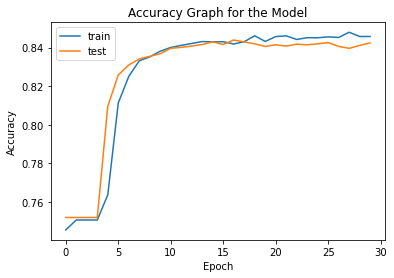

In [78]:
plt.plot(model1_d1.history['accuracy'])
plt.plot(model1_d1.history['val_accuracy'])
plt.title('Accuracy Graph for the Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

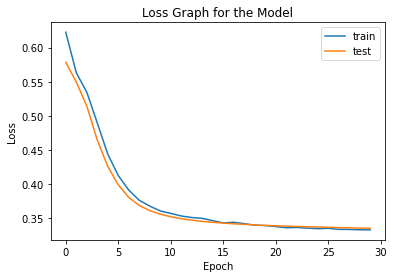

In [79]:
plt.plot(model1_d1.history['loss'])
plt.plot(model1_d1.history['val_loss'])
plt.title('Loss Graph for the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [80]:
c=2
epochs = 30
model1_2 = Sequential()
model1_2.add(tf.keras.Input(shape=11))
model1_2.add(Dense(100,activation='sigmoid',name='Hidden_Layer1',kernel_initializer=init2))
model1_2.add(Dense(100,activation='sigmoid',name='Hidden_Layer2',kernel_initializer=init2))
model1_2.add(Dropout(rate=0.45))
model1_2.add(Dense(2,activation='sigmoid',name='Output_Layer'))
model1_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [81]:
 model1_d2 = model1_2.fit(x_train,y_train,batch_size=128,
                      epochs=epochs,verbose=0,validation_data=(x_test,y_test))

In [82]:
model1_ev2 = model1_2.evaluate(x_test,y_test,verbose = 2)
print("Accuracy on test set for Model 1: ",model1_ev2[1])

189/189 - 1s - loss: 0.3328 - accuracy: 0.8402 - 1s/epoch - 6ms/step
Accuracy on test set for Model 1:  0.8402455449104309


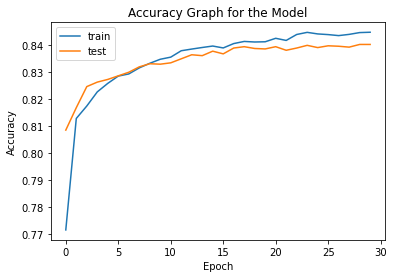

In [83]:
plt.plot(model1_d2.history['accuracy'])
plt.plot(model1_d2.history['val_accuracy'])
plt.title('Accuracy Graph for the Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

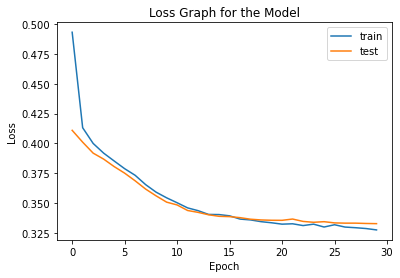

In [84]:
plt.plot(model1_d2.history['loss'])
plt.plot(model1_d2.history['val_loss'])
plt.title('Loss Graph for the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [85]:
c=2
epochs = 25
model1_3 = Sequential()
model1_3.add(tf.keras.Input(shape=11))
model1_3.add(Dense(100,activation='relu',name='Hidden_Layer1',kernel_initializer=init2))
model1_3.add(Dense(100,activation='relu',name='Hidden_Layer2',kernel_initializer=init2))
model1_3.add(Dropout(rate=0.45))
model1_3.add(Dense(2,activation='relu',name='Output_Layer'))
model1_3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [86]:
 model1_d3 = model1_3.fit(x_train,y_train,batch_size=128,
                      epochs=epochs,verbose=0,validation_data=(x_test,y_test))

In [87]:
model1_ev3 = model1_3.evaluate(x_test,y_test,verbose = 2)
print("Accuracy on test set for Model 1: ",model1_ev3[1])

189/189 - 1s - loss: 0.3546 - accuracy: 0.8401 - 712ms/epoch - 4ms/step
Accuracy on test set for Model 1:  0.8400796055793762


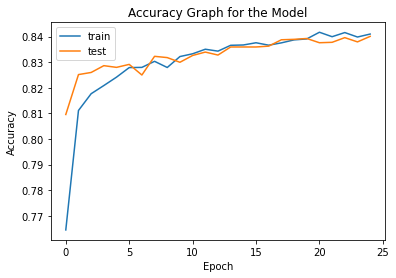

In [88]:
plt.plot(model1_d3.history['accuracy'])
plt.plot(model1_d3.history['val_accuracy'])
plt.title('Accuracy Graph for the Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

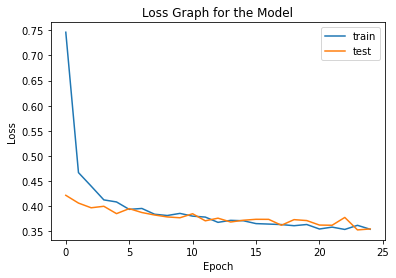

In [89]:
plt.plot(model1_d3.history['loss'])
plt.plot(model1_d3.history['val_loss'])
plt.title('Loss Graph for the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

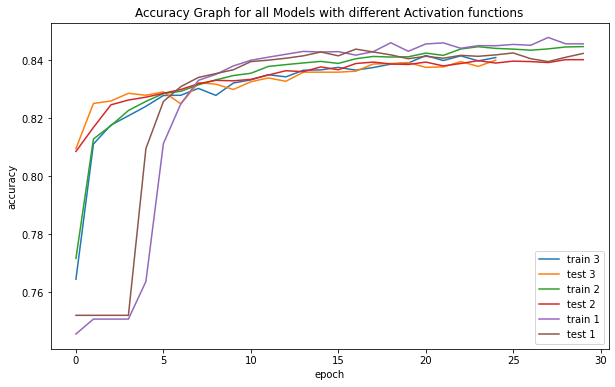

In [90]:
plt.figure(figsize=(10,6))
plt.plot(model1_d3.history['accuracy'])
plt.plot(model1_d3.history['val_accuracy'])
plt.plot(model1_d2.history['accuracy'])
plt.plot(model1_d2.history['val_accuracy'])
plt.plot(model1_d1.history['accuracy'])
plt.plot(model1_d1.history['val_accuracy'])
plt.title('Accuracy Graph for all Models with different Activation functions')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train 3', 'test 3','train 2','test 2','train 1','test 1'], loc='lower right')
plt.show()

#### 2. Optimizing NN model  by varying Optimizers:

In [91]:
#Hyperparamter changing optimizers functions
c=2
epochs = 30
model2_1 = Sequential()
model2_1.add(tf.keras.Input(shape=11))
model2_1.add(Dense(100,activation='softmax',name='Hidden_Layer1',kernel_initializer=init2))
model2_1.add(Dense(100,activation='softmax',name='Hidden_Layer2',kernel_initializer=init2))
model2_1.add(Dropout(rate=0.45))
model2_1.add(Dense(2,activation='softmax',name='Output_Layer'))
model2_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

In [92]:
 model2_d1 = model2_1.fit(x_train,y_train,batch_size=128,
                      epochs=epochs,verbose=0,validation_data=(x_test,y_test))

In [93]:
model2_ev1 = model2_1.evaluate(x_test,y_test,verbose = 2)
print("Accuracy on test set for Model 1: ",model2_ev1[1])

189/189 - 1s - loss: 0.5602 - accuracy: 0.7520 - 1s/epoch - 7ms/step
Accuracy on test set for Model 1:  0.7519907355308533


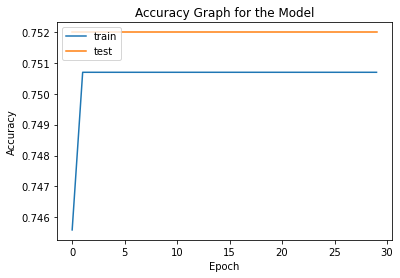

In [94]:
plt.plot(model2_d1.history['accuracy'])
plt.plot(model2_d1.history['val_accuracy'])
plt.title('Accuracy Graph for the Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

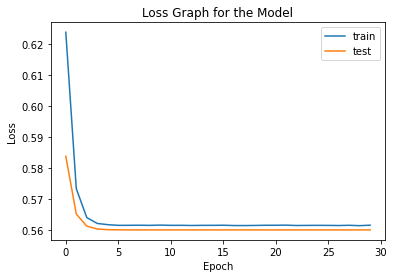

In [95]:
plt.plot(model2_d1.history['loss'])
plt.plot(model2_d1.history['val_loss'])
plt.title('Loss Graph for the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [96]:
c=2
epochs = 30
model2_2 = Sequential()
model2_2.add(tf.keras.Input(shape=11))
model2_2.add(Dense(100,activation='softmax',name='Hidden_Layer1',kernel_initializer=init2))
model2_2.add(Dense(100,activation='softmax',name='Hidden_Layer2',kernel_initializer=init2))
model2_2.add(Dropout(rate=0.45))
model2_2.add(Dense(2,activation='softmax',name='Output_Layer'))
model2_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [97]:
 model2_d2 = model2_2.fit(x_train,y_train,batch_size=128,
                      epochs=epochs,verbose=0,validation_data=(x_test,y_test))

In [98]:
model2_ev2 = model2_2.evaluate(x_test,y_test,verbose = 2)
print("Accuracy on test set for Model : ",model2_ev2[1])

189/189 - 1s - loss: 0.3352 - accuracy: 0.8421 - 1s/epoch - 6ms/step
Accuracy on test set for Model :  0.8420703411102295


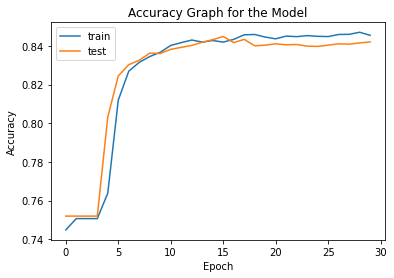

In [99]:
plt.plot(model2_d2.history['accuracy'])
plt.plot(model2_d2.history['val_accuracy'])
plt.title('Accuracy Graph for the Model')
plt.ylabel('Accuracy')

plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

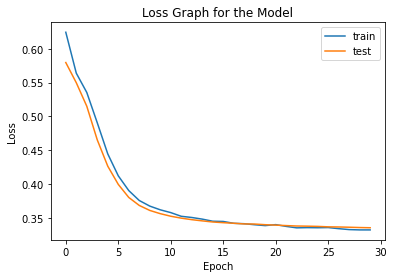

In [100]:
plt.plot(model2_d2.history['loss'])
plt.plot(model2_d2.history['val_loss'])
plt.title('Loss Graph for the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [101]:
c=2
epochs = 30
model2_3 = Sequential()
model2_3.add(tf.keras.Input(shape=11))
model2_3.add(Dense(100,activation='softmax',name='Hidden_Layer1',kernel_initializer=init2))
model2_3.add(Dense(100,activation='softmax',name='Hidden_Layer2',kernel_initializer=init2))
model2_3.add(Dropout(rate=0.45))
model2_3.add(Dense(2,activation='softmax',name='Output_Layer'))
model2_3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [102]:
 model2_d3 = model2_3.fit(x_train,y_train,batch_size=128,
                      epochs=epochs,verbose=0,validation_data=(x_test,y_test))

In [103]:
model2_ev3 = model2_3.evaluate(x_test,y_test,verbose = 2)
print("Accuracy on test set for Model 1: ",model2_ev3[1])

189/189 - 1s - loss: 0.3366 - accuracy: 0.8439 - 1s/epoch - 6ms/step
Accuracy on test set for Model 1:  0.8438951373100281


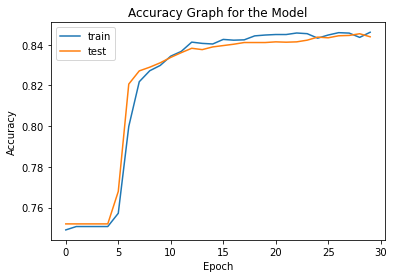

In [104]:
plt.plot(model2_d3.history['accuracy'])
plt.plot(model2_d3.history['val_accuracy'])
plt.title('Accuracy Graph for the Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

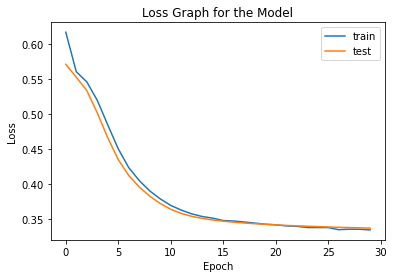

In [105]:
plt.plot(model2_d3.history['loss'])
plt.plot(model2_d3.history['val_loss'])
plt.title('Loss Graph for the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

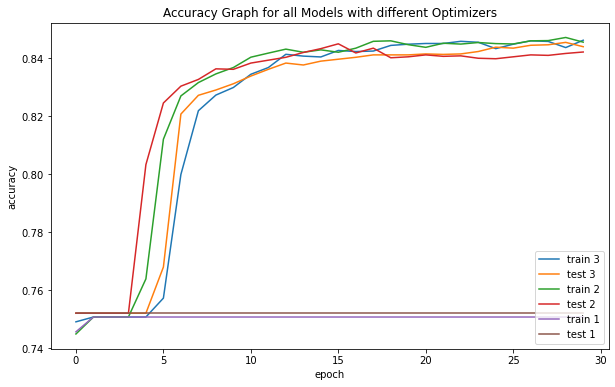

In [106]:
plt.figure(figsize=(10,6))
plt.plot(model2_d3.history['accuracy'])
plt.plot(model2_d3.history['val_accuracy'])
plt.plot(model2_d2.history['accuracy'])
plt.plot(model2_d2.history['val_accuracy'])
plt.plot(model2_d1.history['accuracy'])
plt.plot(model2_d1.history['val_accuracy'])
plt.title('Accuracy Graph for all Models with different Optimizers')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train 3', 'test 3','train 2','test 2','train 1','test 1'], loc='lower right')
plt.show()

#### 3. Optimizing NN model  by varying Kernal Initializers:

In [107]:
#Hyperparamter changing kernas initializers
init1 = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
init2 = tf.keras.initializers.HeUniform(seed=None)
init3 = tf.keras.initializers.Zeros()

In [108]:
c=2
epochs = 30
model3_1 = Sequential()
model3_1.add(tf.keras.Input(shape=11))
model3_1.add(Dense(100,activation='softmax',name='Hidden_Layer1',kernel_initializer=init1))
model3_1.add(Dense(100,activation='softmax',name='Hidden_Layer2',kernel_initializer=init1))
model3_1.add(Dropout(rate=0.45))
model3_1.add(Dense(2,activation='softmax',name='Output_Layer'))
model3_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [109]:
 model3_d1 = model3_1.fit(x_train,y_train,batch_size=128,
                      epochs=epochs,verbose=0,validation_data=(x_test,y_test))

In [110]:
model3_ev1 = model3_1.evaluate(x_test,y_test,verbose = 2)
print("Accuracy on test set for Model 1: ",model3_ev1[1])

189/189 - 1s - loss: 0.3336 - accuracy: 0.8416 - 951ms/epoch - 5ms/step
Accuracy on test set for Model 1:  0.841572642326355


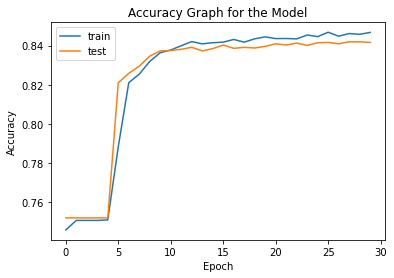

In [111]:
plt.plot(model3_d1.history['accuracy'])
plt.plot(model3_d1.history['val_accuracy'])
plt.title('Accuracy Graph for the Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

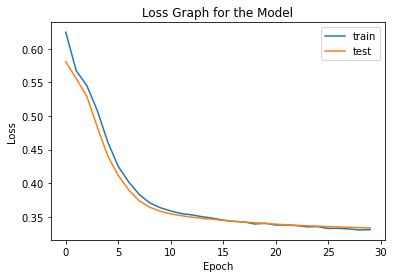

In [112]:
plt.plot(model3_d1.history['loss'])
plt.plot(model3_d1.history['val_loss'])
plt.title('Loss Graph for the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [113]:
c=2
epochs = 30
model3_2 = Sequential()
model3_2.add(tf.keras.Input(shape=11))
model3_2.add(Dense(100,activation='softmax',name='Hidden_Layer1',kernel_initializer=init2))
model3_2.add(Dense(100,activation='softmax',name='Hidden_Layer2',kernel_initializer=init2))
model3_2.add(Dropout(rate=0.45))
model3_2.add(Dense(2,activation='softmax',name='Output_Layer'))
model3_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [114]:
model3_d2 = model3_2.fit(x_train,y_train,batch_size=128,
                      epochs=epochs,verbose=0,validation_data=(x_test,y_test))

In [115]:
model3_ev2 = model3_2.evaluate(x_test,y_test,verbose = 2)
print("Accuracy on test set for Model 1: ",model3_ev2[1])

189/189 - 1s - loss: 0.3354 - accuracy: 0.8407 - 949ms/epoch - 5ms/step
Accuracy on test set for Model 1:  0.8407431840896606


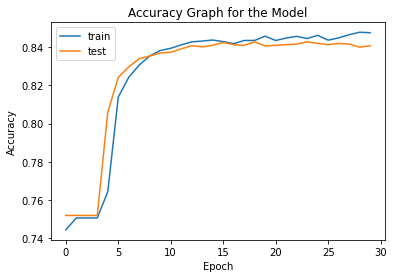

In [116]:
plt.plot(model3_d2.history['accuracy'])
plt.plot(model3_d2.history['val_accuracy'])
plt.title('Accuracy Graph for the Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

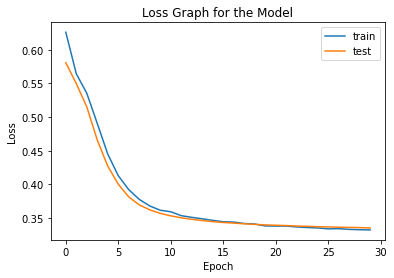

In [117]:
plt.plot(model3_d2.history['loss'])
plt.plot(model3_d2.history['val_loss'])
plt.title('Loss Graph for the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [118]:
c=2
epochs = 30
model3_3 = Sequential()
model3_3.add(tf.keras.Input(shape=11))
model3_3.add(Dense(100,activation='softmax',name='Hidden_Layer1',kernel_initializer=init3))
model3_3.add(Dense(100,activation='softmax',name='Hidden_Layer2',kernel_initializer=init3))
model3_3.add(Dropout(rate=0.45))
model3_3.add(Dense(2,activation='softmax',name='Output_Layer'))
model3_3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [119]:
 model3_d3 = model3_3.fit(x_train,y_train,batch_size=128,
                      epochs=epochs,verbose=0,validation_data=(x_test,y_test))

In [120]:
model3_ev3 = model3_3.evaluate(x_test,y_test,verbose = 2)
print("Accuracy on test set for Model 1: ",model3_ev3[1])

189/189 - 1s - loss: 0.5601 - accuracy: 0.7520 - 1s/epoch - 5ms/step
Accuracy on test set for Model 1:  0.7519907355308533


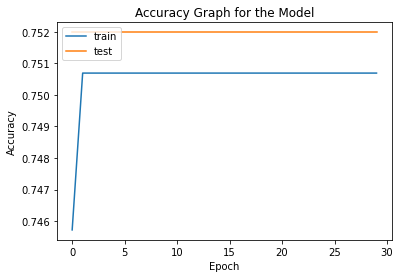

In [121]:
plt.plot(model3_d3.history['accuracy'])
plt.plot(model3_d3.history['val_accuracy'])
plt.title('Accuracy Graph for the Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

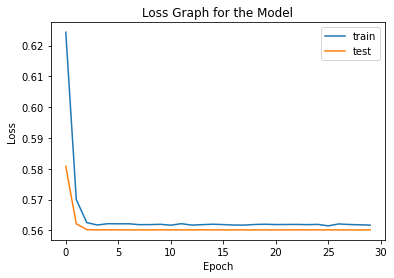

In [122]:
plt.plot(model3_d3.history['loss'])
plt.plot(model3_d3.history['val_loss'])
plt.title('Loss Graph for the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

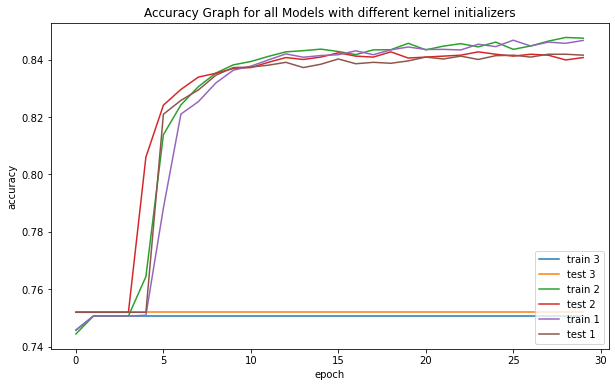

In [123]:
plt.figure(figsize=(10,6))
plt.plot(model3_d3.history['accuracy'])
plt.plot(model3_d3.history['val_accuracy'])
plt.plot(model3_d2.history['accuracy'])
plt.plot(model3_d2.history['val_accuracy'])
plt.plot(model3_d1.history['accuracy'])
plt.plot(model3_d1.history['val_accuracy'])
plt.title('Accuracy Graph for all Models with different kernel initializers')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train 3', 'test 3','train 2','test 2','train 1','test 1'], loc='lower right')
plt.show()

#### 4. Optimizing NN model  by varying Dropouts:

In [124]:
epochs = 30
model4_1 = Sequential()
model4_1.add(tf.keras.Input(shape=11))
model4_1.add(Dense(100,activation='softmax',name='Hidden_Layer1',kernel_initializer=init1))
model4_1.add(Dense(100,activation='softmax',name='Hidden_Layer2',kernel_initializer=init1))
model4_1.add(Dropout(rate=0.2))
model4_1.add(Dense(2,activation='softmax',name='Output_Layer'))
model4_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [125]:
 model4_d1 = model4_1.fit(x_train,y_train,batch_size=128,
                      epochs=epochs,verbose=0,validation_data=(x_test,y_test))

In [126]:
model4_ev1 = model4_1.evaluate(x_test,y_test,verbose = 2)
print("Accuracy on test set for Model 1: ",model4_ev1[1])

189/189 - 1s - loss: 0.3334 - accuracy: 0.8407 - 937ms/epoch - 5ms/step
Accuracy on test set for Model 1:  0.8407431840896606


In [127]:
epochs = 30
model4_2 = Sequential()
model4_2.add(tf.keras.Input(shape=11))
model4_2.add(Dense(100,activation='softmax',name='Hidden_Layer1',kernel_initializer=init1))
model4_2.add(Dense(100,activation='softmax',name='Hidden_Layer2',kernel_initializer=init1))
model4_2.add(Dropout(rate=0.55))
model4_2.add(Dense(2,activation='softmax',name='Output_Layer'))
model4_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [128]:
 model4_d2 = model4_2.fit(x_train,y_train,batch_size=128,
                      epochs=epochs,verbose=0,validation_data=(x_test,y_test))

In [129]:
model4_ev2 = model4_2.evaluate(x_test,y_test,verbose = 2)
print("Accuracy on test set for Model 1: ",model4_ev2[1])

189/189 - 1s - loss: 0.3360 - accuracy: 0.8409 - 927ms/epoch - 5ms/step
Accuracy on test set for Model 1:  0.8409091234207153


In [130]:
epochs = 30
model4_3 = Sequential()
model4_3.add(tf.keras.Input(shape=11))
model4_3.add(Dense(100,activation='softmax',name='Hidden_Layer1',kernel_initializer=init1))
model4_3.add(Dense(100,activation='softmax',name='Hidden_Layer2',kernel_initializer=init1))
model4_3.add(Dropout(rate=0.75))
model4_3.add(Dense(2,activation='softmax',name='Output_Layer'))
model4_3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [131]:
model4_d3 = model4_3.fit(x_train,y_train,batch_size=128,
                      epochs=epochs,verbose=0,validation_data=(x_test,y_test))

In [132]:
model4_ev3 = model4_3.evaluate(x_test,y_test,verbose = 2)
print("Accuracy on test set for Model 1: ",model4_ev3[1])

189/189 - 1s - loss: 0.3387 - accuracy: 0.8411 - 900ms/epoch - 5ms/step
Accuracy on test set for Model 1:  0.8410750031471252


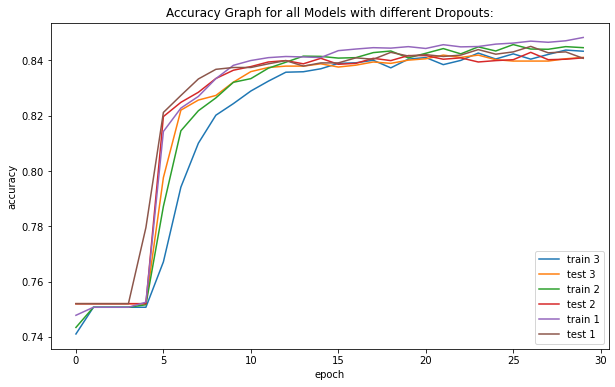

In [134]:
plt.figure(figsize=(10,6))
plt.plot(model4_d3.history['accuracy'])
plt.plot(model4_d3.history['val_accuracy'])
plt.plot(model4_d2.history['accuracy'])
plt.plot(model4_d2.history['val_accuracy'])
plt.plot(model4_d1.history['accuracy'])
plt.plot(model4_d1.history['val_accuracy'])
plt.title('Accuracy Graph for all Models with different Dropouts:')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train 3', 'test 3','train 2','test 2','train 1','test 1'], loc='lower right')
plt.show()

#### Base Model:

In [198]:
#Base Model:
epochs = 30
model_b = Sequential()
model_b.add(tf.keras.Input(shape=11))
model_b.add(Dense(100,activation='relu',name='Hidden_Layer1',kernel_initializer=init1))
model_b.add(Dense(100,activation='relu',name='Hidden_Layer2',kernel_initializer=init1))
model_b.add(Dropout(rate=0.35))
model_b.add(Dense(2,activation='softmax',name='Output_Layer'))
model_b.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [199]:
 model_bb = model_b.fit(x_train,y_train,batch_size=128,
                      epochs=epochs, verbose=0,validation_data=(x_test,y_test))

In [200]:
model_bev1 = model_b.evaluate(x_test,y_test,verbose = 2)
print("Accuracy on test set for Base Model: ",model_bev1[1])

189/189 - 1s - loss: 0.3368 - accuracy: 0.8465 - 1s/epoch - 6ms/step
Accuracy on test set for Base Model:  0.8465494513511658


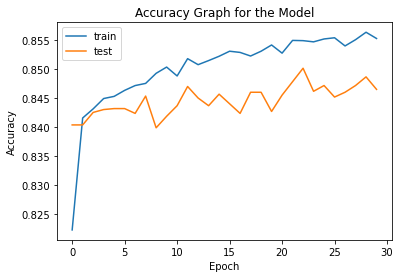

In [201]:
plt.plot(model_bb.history['accuracy'])
plt.plot(model_bb.history['val_accuracy'])
plt.title('Accuracy Graph for the Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

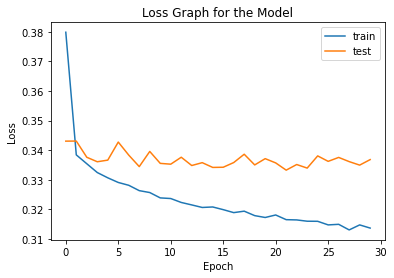

In [202]:
plt.plot(model_bb.history['loss'])
plt.plot(model_bb.history['val_loss'])
plt.title('Loss Graph for the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [203]:
#Callback functions:
e_s = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=4)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [204]:
#Using Reduced Learning:
model_b1 = model_b.fit(x_train,y_train,batch_size=128,epochs=30,callbacks=[reduce_lr], verbose=0,validation_data=(x_test,y_test))
model_bev1 = model_b.evaluate(x_test,y_test,verbose = 2)
print("Accuracy on test set for Model: ",model_bev1[1])

189/189 - 1s - loss: 0.3393 - accuracy: 0.8494 - 1s/epoch - 6ms/step
Accuracy on test set for Model:  0.8493696451187134


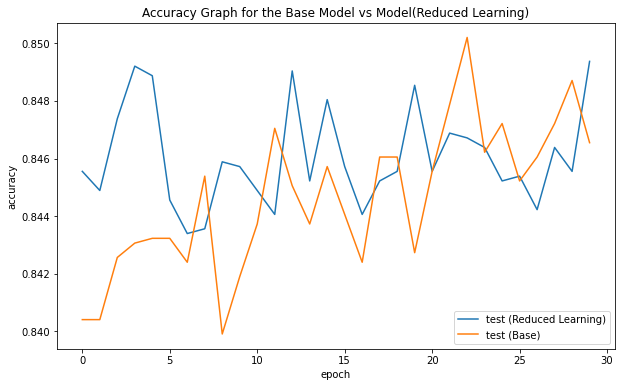

In [205]:
plt.figure(figsize=(10,6))

plt.plot(model_b1.history['val_accuracy'])

plt.plot(model_bb.history['val_accuracy'])
plt.title('Accuracy Graph for the Base Model vs Model(Reduced Learning)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test (Reduced Learning)','test (Base)'], loc='lower right')
plt.show()

In [206]:
#Using Early-Stopping:
model_b2 = model_b.fit(x_train,y_train,batch_size=128,epochs=30,callbacks=[e_s],verbose=0,validation_data=(x_test,y_test))
model_bev2 = model_b.evaluate(x_test,y_test,verbose = 2)
print("Accuracy on test set for Model: ",model_bev2[1])

Epoch 9: early stopping
189/189 - 1s - loss: 0.3414 - accuracy: 0.8462 - 1s/epoch - 6ms/step
Accuracy on test set for Model:  0.8462176322937012


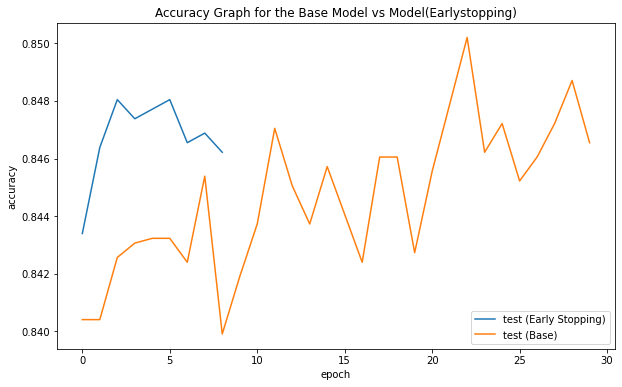

In [208]:
plt.figure(figsize=(10,6))
plt.plot(model_b2.history['val_accuracy'])
plt.plot(model_bb.history['val_accuracy'])
plt.title('Accuracy Graph for the Base Model vs Model(Earlystopping)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test (Early Stopping)','test (Base)'], loc='lower right')
plt.show()

In [209]:
#Using Kernal Regularization:
epochs = 30
model_b3 = Sequential()
model_b3.add(tf.keras.Input(shape=11))
model_b3.add(Dense(100,activation='relu',name='Hidden_Layer1',kernel_initializer=init1))
model_b3.add(Dense(100,activation='relu',name='Hidden_Layer2',kernel_initializer=init1,kernel_regularizer='l1_l2'))
model_b3.add(Dropout(rate=0.35))
model_b3.add(Dense(2,activation='softmax',name='Output_Layer'))
model_b3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [210]:
model_b_3 = model_b3.fit(x_train,y_train,batch_size=128,
                      epochs=30,callbacks=[e_s], verbose=0,validation_data=(x_test,y_test))
model_bev3 = model_b3.evaluate(x_test,y_test,verbose = 2)
print("Accuracy on test set for Model: ",model_bev2[1])

Epoch 15: early stopping
189/189 - 1s - loss: 0.4280 - accuracy: 0.8404 - 1s/epoch - 6ms/step
Accuracy on test set for Model:  0.8462176322937012


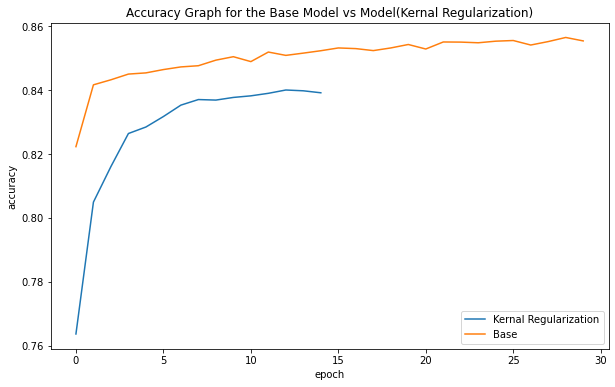

In [211]:
plt.figure(figsize=(10,6))
plt.plot(model_b_3.history['accuracy'])
plt.plot(model_bb.history['accuracy'])
plt.title('Accuracy Graph for the Base Model vs Model(Kernal Regularization)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Kernal Regularization','Base'], loc='lower right')
plt.show()

In [222]:
#Using learning rate scheduler:
def scheduler(epoch, lr):
  if epoch < 2:
    return lr
  else:
    return lr * tf.math.exp(-0.1)
lrs = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [223]:
model_b4 = model_b.fit(x_train,y_train,batch_size=128,epochs=30,callbacks=[lrs],verbose=0,validation_data=(x_test,y_test))
model_bev4 = model_b.evaluate(x_test,y_test,verbose = 2)
print("Accuracy on test set for Model: ",model_bev4[1])

189/189 - 1s - loss: 0.3457 - accuracy: 0.8454 - 1s/epoch - 6ms/step
Accuracy on test set for Model:  0.8453881740570068


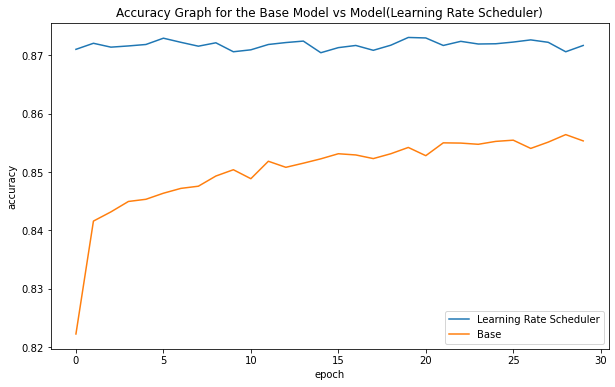

In [224]:
plt.figure(figsize=(10,6))
plt.plot(model_b4.history['accuracy'])
plt.plot(model_bb.history['accuracy'])
plt.title('Accuracy Graph for the Base Model vs Model(Learning Rate Scheduler)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Learning Rate Scheduler','Base'], loc='lower right')
plt.show()

#### References:
####  1.https://www.tensorflow.org/guide/keras/preprocessing_layers#:~:text=The%20Keras%20preprocessing%20layers%20API,part%20of%20a%20Keras%20SavedModel
#### 2. https://github.com/keras-team/keras-io/blob/master/guides/preprocessing_layers.py
#### 3.https://keras.io/api/callbacks/early_stopping/
#### 4.https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html